In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("compas.csv")

In [3]:
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

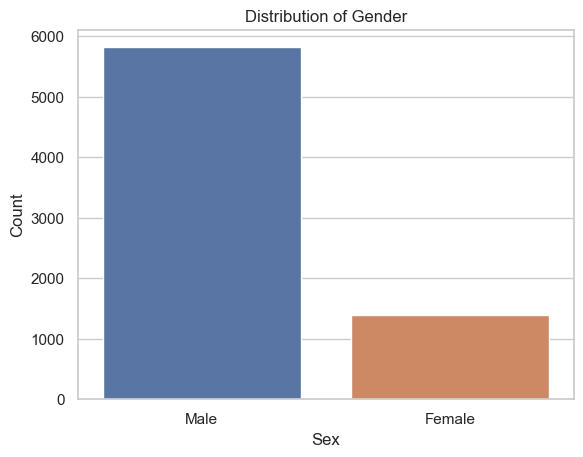

In [5]:
# Create a bar plot
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Assuming 'gender' is the name of the column you want to analyze
sns.countplot(data=df, x='sex')

# Add labels and a title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

1576 4109 1529


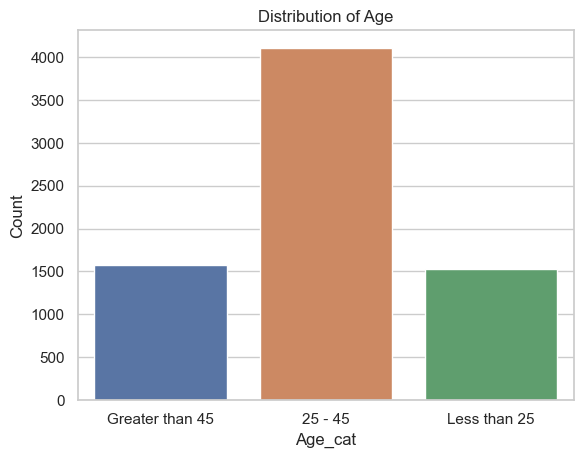

In [6]:
#age_cat - name of column
sns.countplot(data=df, x='age_cat')

# Add labels and a title
plt.xlabel('Age_cat')
plt.ylabel('Count')
plt.title('Distribution of Age')

#label variables
cG45 = 0
c25_45 = 0
cL25 = 0
#going through data
for i in df["age_cat"]:
    #conditions
    if i == "Less than 25":
        cL25 = cL25 + 1
    elif i == "Greater than 45":
        cG45 = cG45 + 1
    else:
        c25_45 = c25_45 + 1
#show results
print(cG45, c25_45, cL25)
# Show the plot
plt.show()

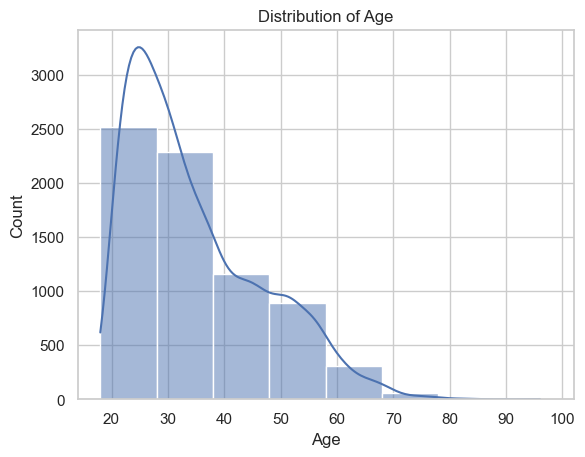

In [7]:
sns.histplot(data=df, x="age", kde=True, binwidth=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

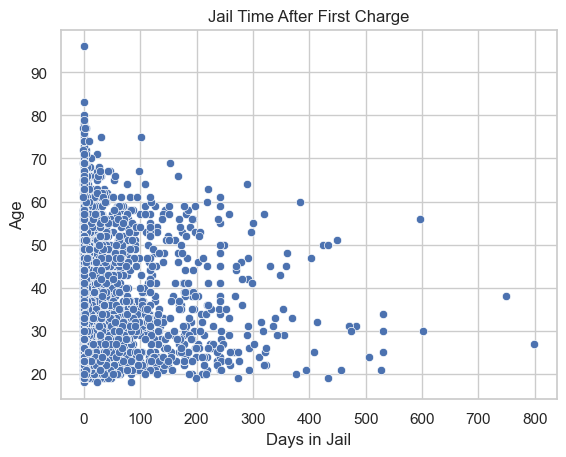

In [8]:
#challenge 7
df["c_jail_in"] = pd.to_datetime(df["c_jail_in"])
df["c_jail_out"] = pd.to_datetime(df["c_jail_out"])
df["days_in_jail"] = (df["c_jail_out"]-df["c_jail_in"]).dt.days

sns.scatterplot(data=df, x="days_in_jail", y="age")
plt.xlabel('Days in Jail')
plt.ylabel('Age')
plt.title('Jail Time After First Charge')
plt.show()

African-American 3696 Caucasian 2454 Hispanic 637 Native American 18 Asian 32 Other 377


Text(0.5, 1.0, 'Distribution of Race')

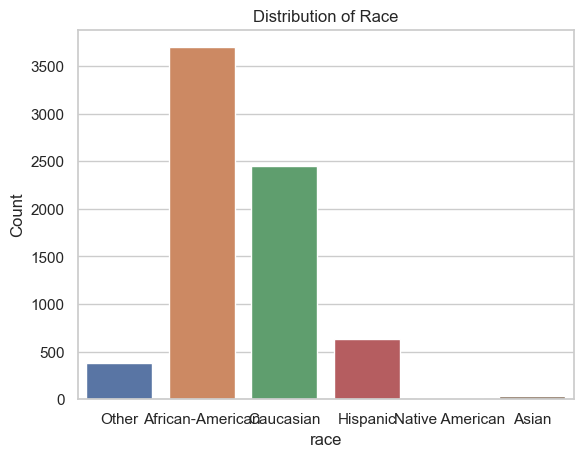

In [9]:
#challenge 8
df["race"].unique()
AA = 0
C = 0
H = 0
NA = 0
A = 0
O = 0
for i in df["race"]:
    if i == 'African-American':
        AA = AA + 1
    elif i == 'Caucasian':
        C = C + 1
    elif i == 'Hispanic':
        H = H + 1
    elif i == 'Native American':
        NA = NA + 1
    elif i == 'Asian':
        A = A + 1
    else: 
        O = O + 1
    
print("African-American", AA, "Caucasian", C, "Hispanic", H, "Native American", NA, "Asian", A, "Other", O)
sns.countplot(data=df, x='race')

# Add labels and a title
plt.xlabel('race')
plt.ylabel('Count')
plt.title('Distribution of Race')


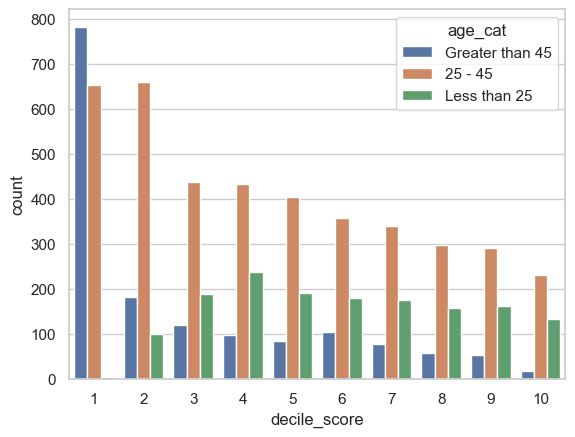

In [10]:
#11
sns.countplot(data=df, x="decile_score", hue="age_cat")
plt.show()

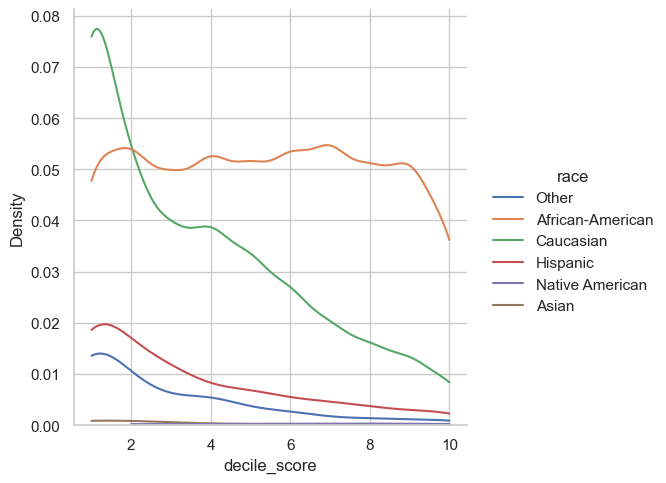

In [15]:
sns.displot(df, x="decile_score", hue="race", kind="kde", cut=0)

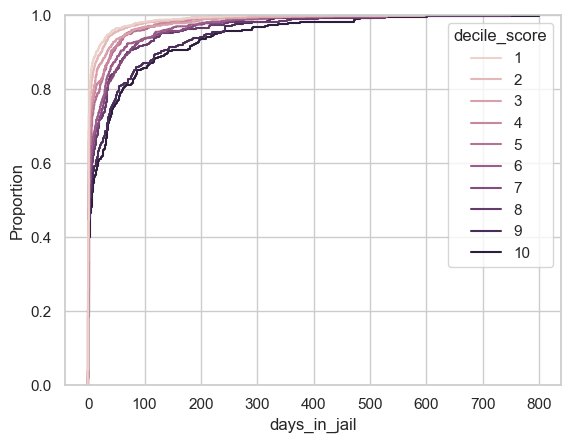

In [13]:
sns.ecdfplot(data=df, x="days_in_jail", hue="decile_score")
plt.show()

two_year_recid     0    1
decile_score             
1               1132  308
2                648  293
3                466  281
4                435  334
5                355  326
6                283  358
7                242  350
8                162  350
9                153  355
10                87  296


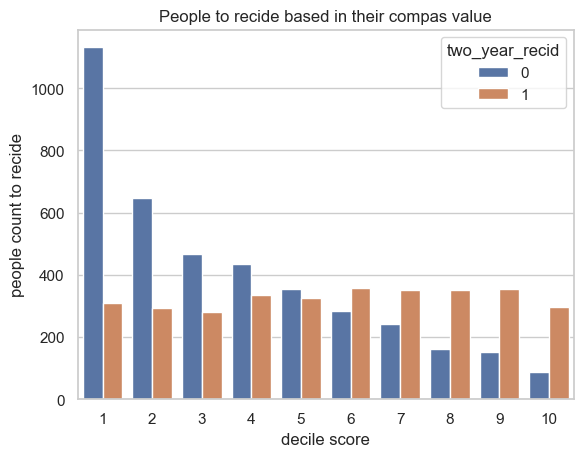

In [19]:
result = df.groupby('decile_score')['two_year_recid'].value_counts().unstack(fill_value=0)
result = result.sort_values(by=0, ascending=False)
print(result)


sns.countplot(data=df, x="decile_score", hue='two_year_recid')
plt.xlabel('decile score')
plt.ylabel('people count to recide')
plt.title('People to recide based in their compas value')
plt.show()

In [16]:
x = 308+293+281+334+326+358+350+350+355+296
print(x)

3251
